In [101]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [103]:
df = pd.read_csv('BIKE DETAILS.csv')

In [105]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [107]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [109]:
df.fillna("0",inplace = True)

In [111]:
df.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1061 non-null   object
 1   selling_price      1061 non-null   int64 
 2   year               1061 non-null   int64 
 3   seller_type        1061 non-null   object
 4   owner              1061 non-null   object
 5   km_driven          1061 non-null   int64 
 6   ex_showroom_price  1061 non-null   object
dtypes: int64(3), object(4)
memory usage: 58.2+ KB


In [115]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

# Q.1 What is the range of selling prices in the dataset ?

In [118]:
max_price = df['selling_price'].max()
min_price = df['selling_price'].min()

In [120]:
price_range = max_price - min_price

In [122]:
print(f"min selling price: {min_price}")

min selling price: 5000


In [124]:
print(f"max selling price : {max_price}")

max selling price : 760000


In [126]:
print(f" range of selling price :{price_range}")

 range of selling price :755000


# Q.2 What is the median selling price for bikes in the dataset ?

In [129]:
median_value = df['selling_price'].median()

In [131]:
print ("median value : ", median_value)

median value :  45000.0


# Q.3 What is the most common seller type ?

In [134]:
df['seller_type'].unique()

array(['Individual', 'Dealer'], dtype=object)

In [136]:
df['seller_type'].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

In [138]:
#  Hence as per above value it is clear that the most common seller_type is Individual types.

# Q.4 How many bikes have driven more than 50,000 kilometers ?

In [141]:
df['km_driven'].describe()

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

In [143]:
Bike_morethen_50000_kms = df[df['km_driven']> 50000]

In [145]:
counts = len(Bike_morethen_50000_kms )

In [147]:
print ("Bike_morethen_50000_kms is ", counts)

Bike_morethen_50000_kms is  170


# Q. 5 What is the average km_driven value for each ownership type ?

In [150]:
df["owner"].unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

# Q.6  What proportion of bikes are from the year 2015 or older .

In [154]:
bikes_2015_or_older = df[df['year'] >= 2015].shape[0]

In [156]:
bikes_2015_or_older

560

# Q.07 What is the trend of missing values across the dataset ?

In [159]:
missing_value = df.isnull().sum()

In [161]:
missing_value

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

In [163]:
# to visualise the trend"

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

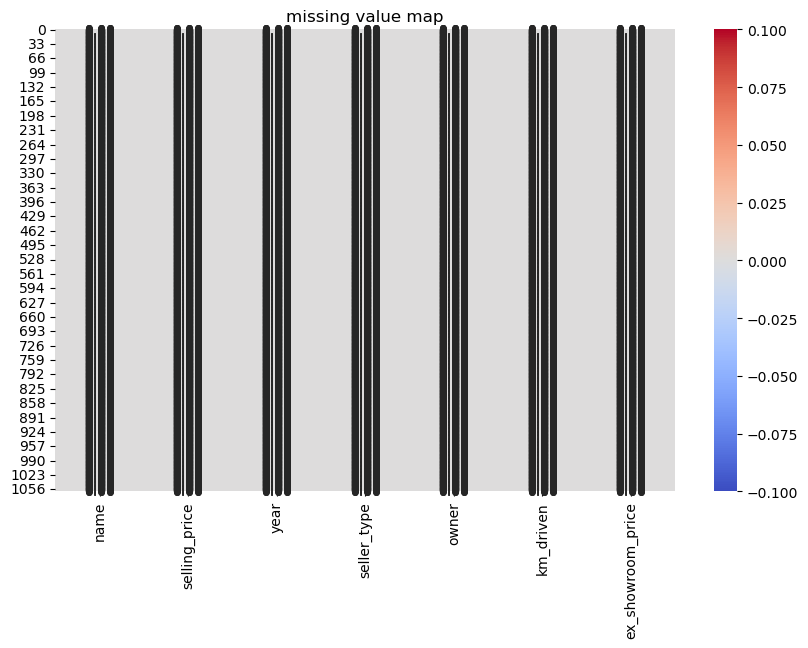

In [167]:
plt.figure(figsize = (10,6))
sns.heatmap(df.isnull(),annot = True , cmap = 'coolwarm',fmt = '.2f')
plt.title("missing value map")
plt.show()

# Q.8 What is the highest ex_showroom_price recorded, and for which bike ?

In [216]:
df['ex_showroom_price'] = df['ex_showroom_price'].astype(int)

In [226]:
highest_price = df.loc[df['ex_showroom_price'].idxmax()]

In [228]:
highest_price

name                 Harley-Davidson Street Bob
selling_price                            750000
year                                       2013
seller_type                          Individual
owner                                 2nd owner
km_driven                                 12000
ex_showroom_price                       1278000
Name: 134, dtype: object

# Q9 What is the total number of bikes listed by each seller type ?

In [176]:
number_of_bike_listed_by_each_seller = df['seller_type'].value_counts()

In [178]:
number_of_bike_listed_by_each_seller

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

# Q.10 What is the relationship between selling_price and km_driven for first-owner bikes ?

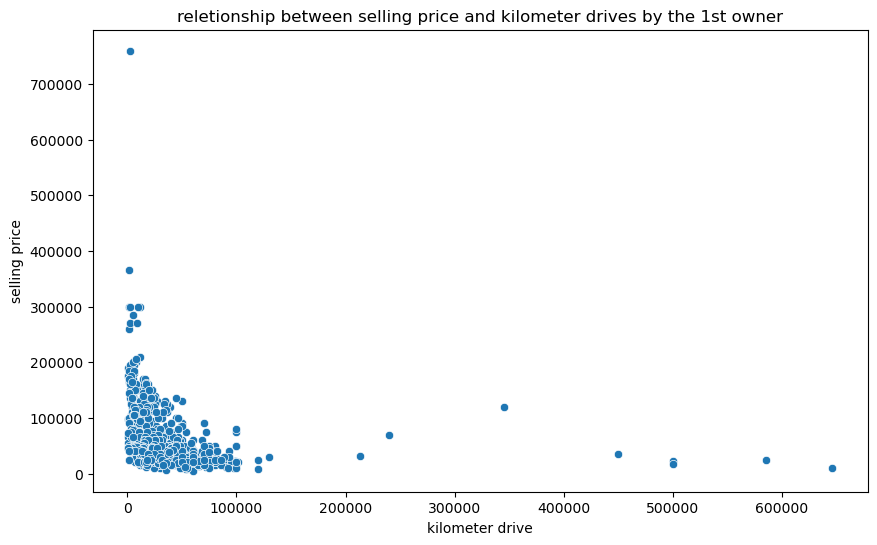

In [186]:
df_first_owner = df[df['owner'] == '1st owner']
plt.figure(figsize = (10,6))
sns.scatterplot(x = df_first_owner['km_driven'] , y = df_first_owner['selling_price'])
plt.xlabel('kilometer drive')
plt.ylabel('selling price')
plt.title('reletionship between selling price and kilometer drives by the 1st owner')
plt.show()

In [188]:
# Finding a correletion between the seling price and kilometer drives


In [230]:
correletion = df_first_owner[['selling_price' ,'km_driven']].corr()

In [198]:
print ('correletion between the seling price and kilometer drives by the 1st owner', correletion)

correletion between the seling price and kilometer drives by the 1st owner                selling_price  km_driven
selling_price       1.000000  -0.243482
km_driven          -0.243482   1.000000


# Q.11 Identify and remove outliers in the km_driven column using the IQR method ?


In [237]:
# calculate IQR 
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)


In [239]:
IQR = Q3=Q1 

In [241]:
IQR

13500.0

In [247]:
#defining the lower_bound and upper_bound
lower_bound = Q1-.5*IQR
upper_bound = Q3-1.5*IQR

In [249]:
# filter out the outlier 
df_filter = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

In [251]:
df_filter

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price


In [253]:
# display the no. of rows before and after the outlier remover


In [259]:
print("original data set", df.shape[0])

original data set 1061


In [263]:
print("cleaned dataset", df_filter.shape[0])

cleaned dataset 0


# Q 12 Perform a bivariate analysis to visualize the relationship between year and selling_price ?

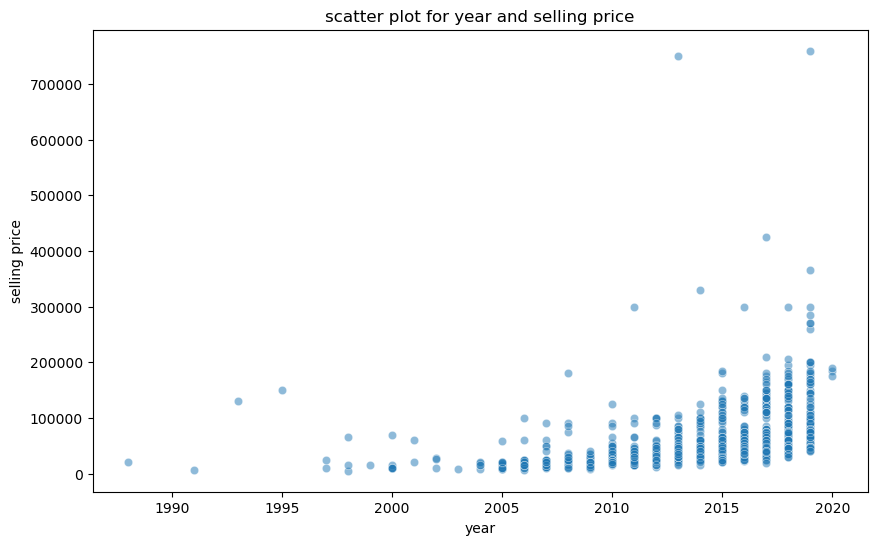

In [268]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = df['year'] , y = df['selling_price'],alpha = 0.5)
plt.title('scatter plot for year and selling price')
plt.xlabel('year')
plt.ylabel('selling price')
plt.show()

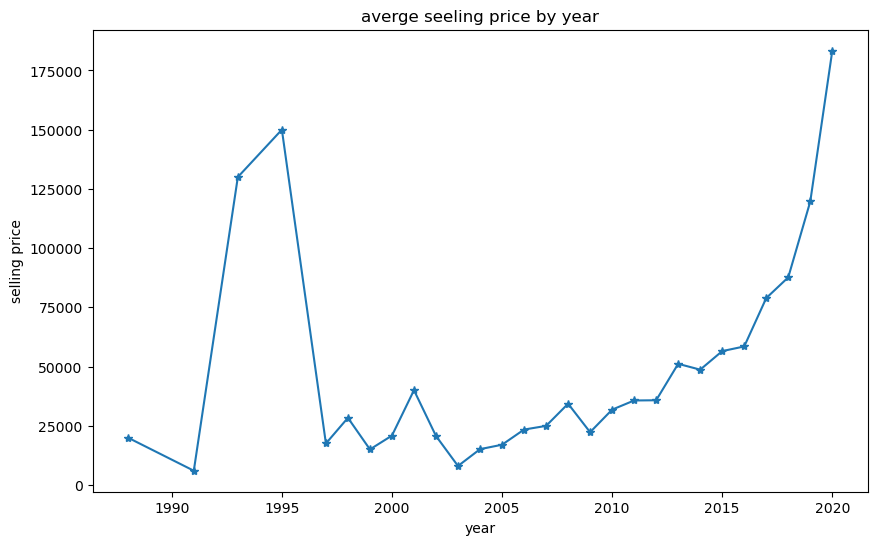

In [272]:
plt.figure(figsize = (10,6))
df_group = df.groupby('year')['selling_price'].mean()
df_group.plot(marker = '*', linestyle = '-')
plt.title('averge seeling price by year')
plt.xlabel('year')
plt.ylabel('selling price')
plt.show()

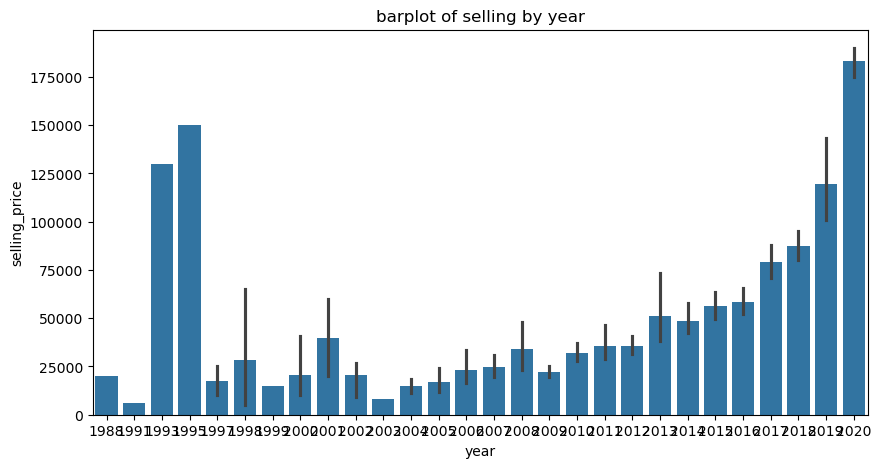

In [274]:
plt.figure(figsize = (10,5))
sns.barplot(x = df['year'] , y = df['selling_price'])
plt.title('barplot of selling by year')
plt.xlabel('year')
plt.ylabel('selling_price')
plt.show()